# Python: A very brief tour

Everything I know about Python I've learned from reading about it and trying stuff out.  You can do this too. I recommend the [Whirlwind Tour of Python](https://jakevdp.github.io/WhirlwindTourOfPython/) and the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) both by Jake VanderPlas.

Below, I give some examples of aspects of Python as a language and a look at some basic tasks done with **NumPy**, **Matplotlib** and **Uncertainties** packages.


### In Python, everything is an "object"

That means everything has a **type**, has additional data called **attributes** and internal functions called **methods**.  You can see what these are with the `type()`, `help()` and `dir()` functions.

In [1]:
a = -35.4

In [2]:
type(a)

float

In [3]:
# is_integer() is a Boolean method that retirns true if the floating point number 
# could be replaced with an integer without loss of precision.
#
a.is_integer()

False

### Variables are pointers

But, most basic types are "immutable" so you can't tell.  Immutable means it cannot be changed, so if you try to change it, what you really do is reassign the variable to point to a new object.  

In [4]:
b = a
print(b)

-35.4


In [5]:
a = 5
print(a)
print(b)

5
-35.4


### But...

"Mutable" types can change their contents.  The variable "pointer" points to the structure, not the contents of the mutable structure.  This is most relevant with lists. 

In [6]:
numbers = [1,2,3,4,5,6,7,8, 9.5]
numbers

[1, 2, 3, 4, 5, 6, 7, 8, 9.5]

In [7]:
a = numbers
b = a
print("a =", a)
print("b =", b)

a = [1, 2, 3, 4, 5, 6, 7, 8, 9.5]
b = [1, 2, 3, 4, 5, 6, 7, 8, 9.5]


In [8]:
b[0] = 10
print("a =", a)
print("b =", b)
print("numbers =", numbers)

a = [10, 2, 3, 4, 5, 6, 7, 8, 9.5]
b = [10, 2, 3, 4, 5, 6, 7, 8, 9.5]
numbers = [10, 2, 3, 4, 5, 6, 7, 8, 9.5]


To save the list no a new variable that will not affect the old list, use the copy() method

In [9]:
numbers = [1,2,3,4,5,6,7,8, 9.5]
a = numbers.copy()
b = a
b[0] = 56.2
print("a =", a)
print("b =", b)
print("numbers =", numbers)

a = [56.2, 2, 3, 4, 5, 6, 7, 8, 9.5]
b = [56.2, 2, 3, 4, 5, 6, 7, 8, 9.5]
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9.5]


### The real action is in Python packages

Every notebook will include **NumPy** and **Matplotlib**

In [10]:
# Usually import packages via a handle to the functions in them using import ... as ...
#
import numpy as np
import matplotlib.pyplot as plt
import uncertainties as unc
%matplotlib inline

A NumPy array is really useful. Compare similar operations with the original list.  Numpy arrays allow you to change every element of an array as easily as changing a single vaule.

In [11]:
c = np.array(numbers)
c

array([1. , 2. , 3. , 4. , 5. , 6. , 7. , 8. , 9.5])

In [12]:
print("numbers * 2 = ", numbers * 2)
print("c ** 2 =", c ** 2)

numbers * 2 =  [1, 2, 3, 4, 5, 6, 7, 8, 9.5, 1, 2, 3, 4, 5, 6, 7, 8, 9.5]
c ** 2 = [ 1.    4.    9.   16.   25.   36.   49.   64.   90.25]


Mathematical operations on lists concern concatinations, and in order to work, the operands must be lists.

In [13]:
print("c + 2 =", c + 2)
print("numbers + 2 = ", numbers + 2)

c + 2 = [ 3.   4.   5.   6.   7.   8.   9.  10.  11.5]


TypeError: can only concatenate list (not "int") to list

NumPy functions will often convert numerical lists into NumPy arrays automatically.

In [14]:
print("sin(c) =", np.sin(c))
print("sin(numbers) =", np.sin(numbers))

sin(c) = [ 0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427 -0.2794155
  0.6569866   0.98935825 -0.07515112]
sin(numbers) = [ 0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427 -0.2794155
  0.6569866   0.98935825 -0.07515112]


Look at all of the methods inside a NumPy array!

In [15]:
help(c)

Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any objec

## A simple plot with a simple fit

Very basic - like Excel ***trendline***

### Example from physics 331 - Michelson Na fringe-contrast nodes

Readings are from a micrometer position of points that should be linearly spaced.

In [16]:
# Node locations, using extreme limits of where nodes might be, i.e., as far as I can tell
# the first node lies between 15.354 and 15.243 mm.
#
Na_nodes_data = np.array([
    [15.354,15.243],
    [15.611,15.563],
    [15.925,15.856],
    [16.214,16.148],
    [16.485,16.452],
    [16.764,16.748],
    [17.042,17.049],
    [17.335,17.343],
    [17.617,17.643],
    [17.903,17.939],
    [18.178,18.233],
    [18.481,18.534],
    [18.778,18.824]])

To understant the statement below, you need to learn how indexing works in Python.  See **The Whirlwind Tour** (link at top) for more information.

In [17]:
# Find the midpoints
#
Na_nodes = (Na_nodes_data[:,0]+Na_nodes_data[:,1])/2.0
print(Na_nodes)

[15.2985 15.587  15.8905 16.181  16.4685 16.756  17.0455 17.339  17.63
 17.921  18.2055 18.5075 18.801 ]


In [18]:
# Assign a number to each node.  But want the center node to be 0
# The size attribute gives the number of elements in the array.

node_num = np.arange(Na_nodes.size)-Na_nodes.size//2
node_num

array([-6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6])

### Make a plot

With axes labels **(Required!)**

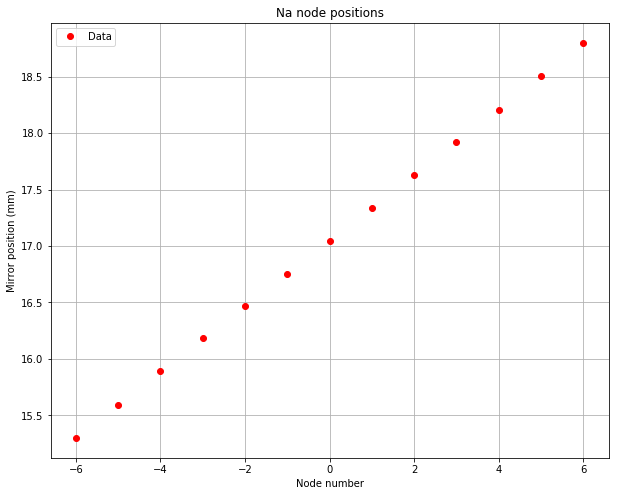

In [19]:
plt.figure(figsize=(10,8))
plt.plot(node_num,Na_nodes,'ro',label="Data")
plt.grid(True)
plt.xlabel('Node number')
plt.ylabel('Mirror position (mm)')
plt.title('Na node positions')
plt.legend();

### Fit a line

Very basic.  Later we'll use something much more powerful.

In [20]:
# The first line does a fit, and returns the fitting coefficients
#
my_coeff = np.polyfit(node_num,Na_nodes,1) # This fits a line (degree-1 polynomial)
#
print(my_coeff)
print('Intercept = {:.4f} mm'.format(my_coeff[1]))
print('Slope = {:.4f} mm/node'.format(my_coeff[0]))


[ 0.29122802 17.04853846]
Intercept = 17.0485 mm
Slope = 0.2912 mm/node


In [21]:
# The poly1d function uses the coefficients and creates a function of them
#
cal = np.poly1d(my_coeff)  # This makes a polynomial function from the coefficients
print(np.poly1d(cal))
cal(2.0)

 
0.2912 x + 17.05


17.6309945054945

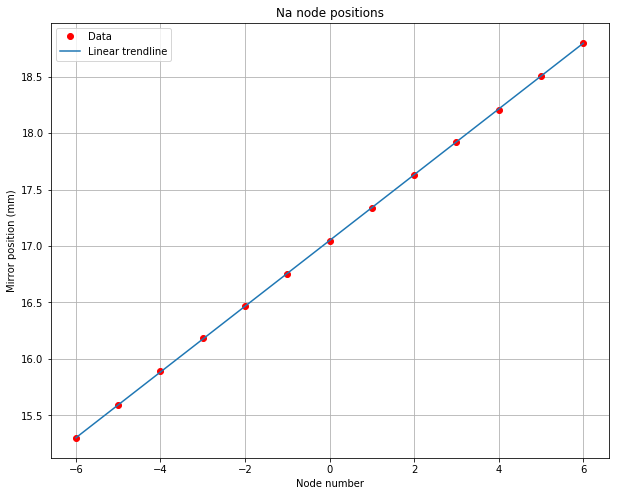

In [22]:
# Now we can add a fitline
#
plt.figure(figsize=(10,8))
plt.plot(node_num,Na_nodes,'ro',label="Data")
plt.plot(node_num,cal(node_num),'-',label="Linear trendline")
plt.grid(True)
plt.xlabel('Node number')
plt.ylabel('Mirror position (mm)')
plt.title('Na node positions')
plt.legend();

## Manipulating distributions

A brief introduction and example concerning uncertainty propagation

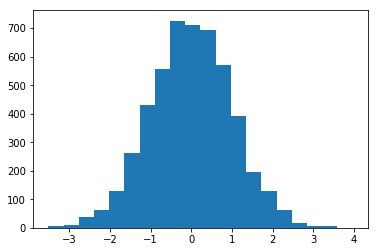

In [23]:
# Generate a random distribution: Gaussian with mean = 0 and Std Dev = 1

data = np.random.randn(5000)

# Plot a histogram
plt.hist(data,bins=20);

In [24]:
# what's the mean & std dev?
print('Mean = {:.4f}'.format(data.mean()))
print('Standard deviation = {:.4f}'.format(np.std(data)))

Mean = -0.0058
Standard deviation = 1.0037


Make new distributions.  Add them.  Plot all.

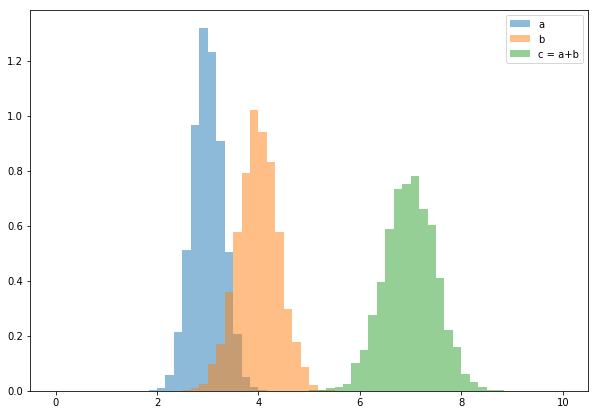

In [25]:
a = 3.0 + 0.3*np.random.randn(5000)
b = 4.0 + 0.4*np.random.randn(5000)

c = a+b

kwargs = dict(density=True, bins=60, alpha=.5, range=(0,10))

plt.figure(figsize=(10,7))
plt.hist(a,**kwargs, label='a')
plt.hist(b,**kwargs, label='b')
plt.hist(c,**kwargs, label='c = a+b')
plt.legend();


### Calculate the expected standard deviation using the sum of squares rule

Then compare it to what you get from the sum of the two distributions

In [26]:
sigma_c = np.sqrt(a.std()**2 + b.std()**2)
print('Expected std. dev. = {:.4f}'.format(sigma_c))

Expected std. dev. = 0.4965


In [27]:
print('Actual std. dev. = {:.4f}'.format(c.std()))

Actual std. dev. = 0.4980


### Now invoke Uncertainties



In [28]:
# Create uncertainty objects
# a "ufloat" has a value and an uncertainty

ua = unc.ufloat(a.mean(),a.std())
ub = unc.ufloat(b.mean(),b.std())
uc = unc.ufloat(c.mean(),c.std())

print("ua =",ua,", ub =",ub,", uc =", uc)
print("ua + ub =", ua + ub)

ua = 2.99+/-0.30 , ub = 4.0+/-0.4 , uc = 7.0+/-0.5
ua + ub = 7.0+/-0.5


Notice how the uncertainty was propagated to the sum of `a` and `b` automatically.

The package also has useful formatting code.  It prints the value and uncertainty to the same precision (same number of digits past the decimal point). 

In [29]:
print('C = {:.2u}'.format(uc))

# The "P" tag looks prettier

print('C = {:.2uP}'.format(uc))

C = 6.99+/-0.50
C = 6.99±0.50


### Compare a few more propagation calculations to those found from combining whole distributions

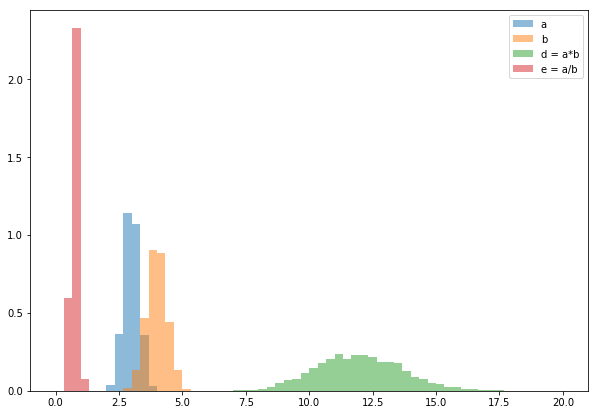

In [30]:
d = a*b
e = a/b

kwargs = dict(density=True, bins=60, alpha=.5, range=(0,20))

plt.figure(figsize=(10,7))
plt.hist(a,**kwargs, label='a')
plt.hist(b,**kwargs, label='b')
plt.hist(d,**kwargs, label='d = a*b')
plt.hist(e,**kwargs, label='e = a/b')
plt.legend();


In [31]:
ud = unc.ufloat(d.mean(),d.std())
ue = unc.ufloat(e.mean(),e.std())

print('d = {:.2uP}'.format(ud))
print('e = {:.2uP}'.format(ue))

d = 12.0±1.7
e = 0.76±0.11


In [32]:
print('ud, calc = {:.2uP}'.format(ua*ub))
print('ue, calc = {:.2uP}'.format(ua/ub))


ud, calc = 12.0±1.7
ue, calc = 0.75±0.11


## Slices, manipulating arrays, and the meaning of "Standard Error"

In [33]:
# Select a range with a "slice"

N = 5
print(data[0:N])
print(np.sum(data[0:N]))

[-0.47778985  0.21592     0.53622545  1.10877622 -0.57982396]
0.8033078555004118


In [34]:
# Allow the beginning and end to change with a variable
N = 5
i = 1
for i in range(10):
    print(i*N,':',(i+1)*N,' ',np.sum(data[i*N:i*N+N]))

0 : 5   0.8033078555004118
5 : 10   1.6264836118995394
10 : 15   -0.3748029029773917
15 : 20   -2.704634572621804
20 : 25   -1.8083716468661584
25 : 30   3.239493076689646
30 : 35   1.1025994771321623
35 : 40   -0.37815931327179186
40 : 45   0.22932755404193195
45 : 50   -3.7350217938177344


In [35]:
# Use the append() command to add a mean to an array (i.e., list).

N = 5
i = 1
list_of_means = [] #initializes list
for i in range(10):
    # print(i*N,':',(i+1)*N)
    # print(data[i*N:i*N+N])
    list_of_means.append(np.sum(data[i*N:(i+1)*N]))
    
print(list_of_means)

[0.8033078555004118, 1.6264836118995394, -0.3748029029773917, -2.704634572621804, -1.8083716468661584, 3.239493076689646, 1.1025994771321623, -0.37815931327179186, 0.22932755404193195, -3.7350217938177344]


In [36]:
# create means of random numbers over fixed N with a function

def find_means(data,N=10):
    k = len(data)//N
    list_of_means = []
    for i in range(k-1):
        list_of_means.append(np.mean(data[i*N:i*N+N]))
    return list_of_means

# Same thing with a Python "list comprehension"
def find_means_ver2(data,N=10):
    return [np.mean(data[i*N:i*N+N]) for i in range((len(data)//N) - 1)]


In [37]:
print('Population std dev = {:.4g}'.format(np.std(data)))
n=100
print('Mean of {:d} std dev = {:.4g}'.format(n,np.std(find_means(data,N=n))))
print('"Standard deviation of the mean" = {:.5g}'.format(np.std(data)/np.sqrt(n)))      

Population std dev = 1.004
Mean of 100 std dev = 0.09669
"Standard deviation of the mean" = 0.10037


Notice how taking means of larger subsets makes the width of the distribution of the means smaller.  The mean value of a data set always has less uncertainty than the standard deviation of that data set.

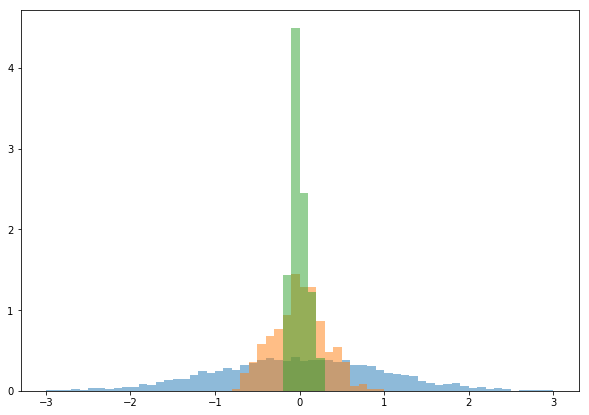

In [38]:
kwargs = dict(density=True, bins=60, alpha=.5, range=(-3,+3))

# See the docs on matplotlib.pyplot.hist()
#    density=True normalizes the distribution
#    range sets the x-axis range
#    alpha=0.5 makes the histogram bins partially transparent.

plt.figure(figsize=(10,7))
plt.hist(data, **kwargs)
plt.hist(find_means(data,N=10), **kwargs)
plt.hist(find_means(data,N=100), **kwargs);
